# Analysis of the factors that affect the prices of listings

#### Cleaning the data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter

inputDF = pd.read_csv('../data/listings.csv')
inputDF=inputDF[['id','name','summary','longitude','latitude','space','description','instant_bookable','neighborhood_overview','neighbourhood_cleansed','host_id','host_name','host_since',
                 'host_response_time','street', 'zipcode','review_scores_rating','property_type','room_type','accommodates','bathrooms','bedrooms','beds','reviews_per_month','amenities','cancellation_policy','number_of_reviews','price']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

#exclude the listings with 0 for price,beds,bedrooms,accomodates etc
inputDF = inputDF[inputDF.bathrooms >0]
inputDF = inputDF[inputDF.bedrooms > 0]
inputDF = inputDF[inputDF.beds > 0]
inputDF = inputDF[inputDF.price  > 0]
inputDF = inputDF[inputDF.review_scores_rating  > 0]
inputDF = inputDF[inputDF.reviews_per_month > 0]
inputDF = inputDF[inputDF.accommodates  > 0]
inputDF.head()

C:\Users\chait\Anaconda3.7\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,name,summary,longitude,latitude,space,description,instant_bookable,neighborhood_overview,neighbourhood_cleansed,...,room_type,accommodates,bathrooms,bedrooms,beds,reviews_per_month,amenities,cancellation_policy,number_of_reviews,price
0,9835,Beautiful Room & House,0,145.09213,-37.77268,"House: Clean, New, Modern, Quite, Safe. 10Km f...","House: Clean, New, Modern, Quite, Safe. 10Km f...",f,Very safe! Family oriented. Older age group.,Manningham,...,Private room,2,1.0,1.0,2.0,0.04,"{Internet,Wifi,""Pets live on this property"",Do...",strict_14_with_grace_period,4,60.0
1,10803,Room in Cool Deco Apartment in Brunswick East,A large air conditioned room with queen spring...,144.98074,-37.76651,The apartment is Deco/Edwardian in style and h...,A large air conditioned room with queen spring...,t,This hip area is a crossroads between two grea...,Moreland,...,Private room,2,1.0,1.0,1.0,1.56,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,H...",strict_14_with_grace_period,117,36.0
2,12936,St Kilda 1BR+BEACHSIDE+BALCONY+GARAGE+WIFI+AC,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,144.97737,-37.85976,FREE WiFi FREE in-building remote controlled g...,RIGHT IN THE HEART OF ST KILDA! It doesn't get...,f,A stay at our apartment means you can enjoy so...,Port Phillip,...,Entire home/apt,3,1.0,1.0,2.0,0.21,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",strict_14_with_grace_period,22,159.0
3,15246,Large private room-close to city,"Comfortable, relaxed house, a home away from ...",144.98923,-37.75897,The atmosphere is relaxed and easy going. You ...,"Comfortable, relaxed house, a home away from ...",f,"This is a great neighbourhood – it is quiet, y...",Darebin,...,Private room,1,1.5,1.0,1.0,0.29,"{TV,Internet,Wifi,Kitchen,""Free parking on pre...",moderate,29,50.0
4,16760,Melbourne BnB near City & Sports,0,144.99224,-37.86453,We offer comfortable accommodation in Inner Me...,We offer comfortable accommodation in Inner Me...,f,0,Port Phillip,...,Private room,2,1.0,1.0,1.0,0.77,"{Internet,Wifi,Heating,Washer,""Smoke detector""...",moderate,68,70.0


#### Categorizing differernt listings based on room_type

In [2]:

roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF

,room_type,number_Of_Listings
0,Entire home/apt,11383
1,Private room,5453
2,Shared room,194


#### Visualizing the above categorization

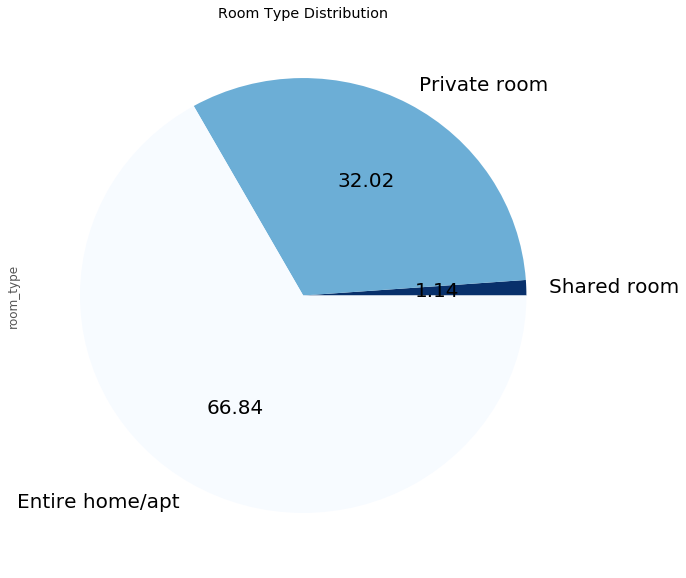

In [4]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

room = inputDF.room_type
r = Counter(room)

room_df = pd.DataFrame.from_dict(r, orient='index').sort_values(by=0)
room_df.columns = ['room_type']
room_df.plot.pie(y = 'room_type', 
                 colormap = 'Blues_r', 
                 figsize=(10,10), 
                 fontsize = 20, autopct = '%.2f',
                 legend = False,
                 title = 'Room Type Distribution')

#### Analyzing and plotting the number of listings based on their property type

Text(0,0.5,'Number of listings')

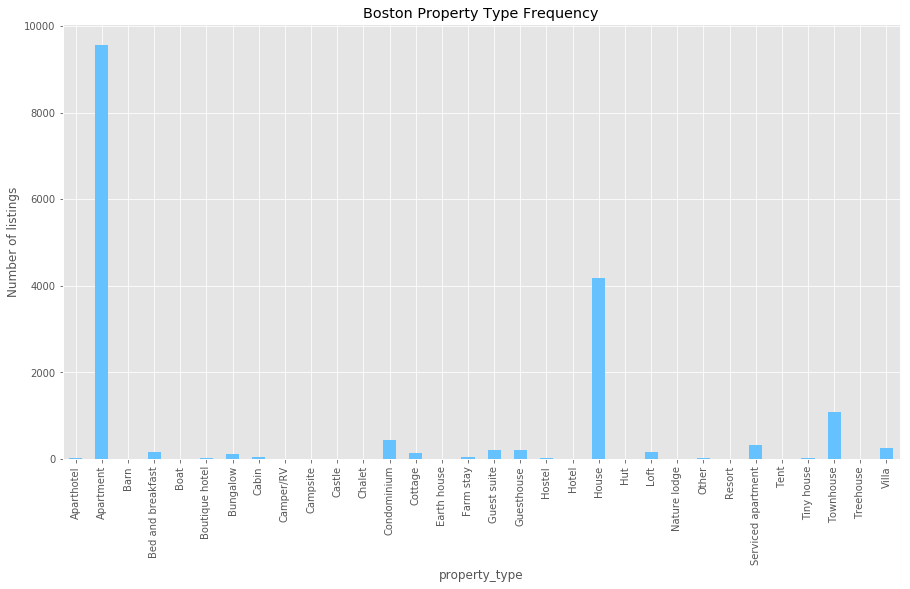

In [5]:


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'Number_Of_Listings'})

objects = propertytype_DF['property_type']
y_pos = propertytype_DF['Number_Of_Listings']

propertytype_DF.plot(kind='bar', 
           x='property_type',
           y='Number_Of_Listings',
           color = '#66c2ff', 
           figsize =(15,8), 
           title = 'Boston Property Type Frequency', 
           legend = False)
plt.ylabel('property type')
plt.ylabel('Number of listings')

It can be concluded that people are more inclined towards listing their entire property than that of private rooms or shared rooms.It can also be seen that property type also plays an important factor. Not surprisingly, Apartment and houses take up an overwhelming majority of all listings, although we do see few instances unfamiliar residencies here and there.

#### Analyzing the prices for different room type and property type and plotting the same on a heatmap

In [6]:

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price
19,Campsite,Entire home/apt,1200.000000
20,Castle,Entire home/apt,488.000000
48,Nature lodge,Private room,460.166667
67,Villa,Entire home/apt,369.755319
10,Boutique hotel,Entire home/apt,300.000000


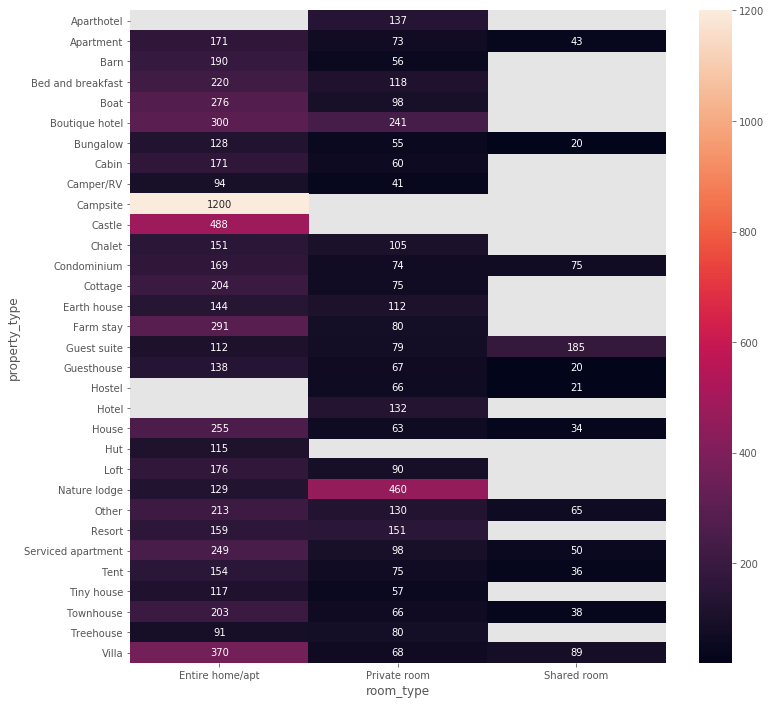

In [7]:
#Plotting the same on a heatMap

import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".0f")

This chart allows us to see all the listings' prices broken down by property type and room type. This gives us a much better understanding of the price breakdown in Melbourne based on property and room types.
It can be analyzed that for almost all property type,prices for Entire home/apartment are the maximum.This tells us that Property type and room type plays a very important role in deciding price of a listing.

#### Analysing how number of bedrooms affect the price of the listings
HeatMap for variation of prices with number of bedrooms for listings

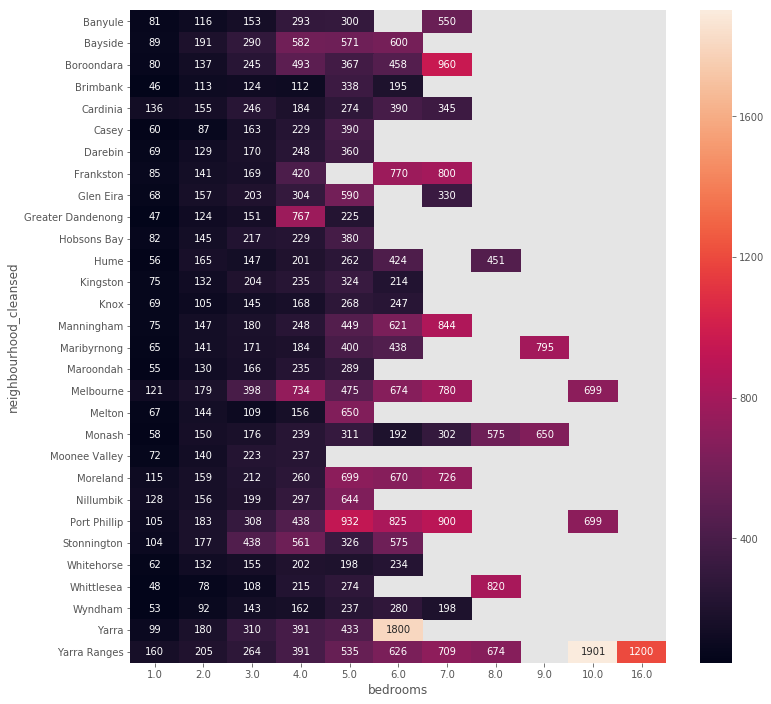

In [8]:

plt.figure(figsize=(12,12))
sns.heatmap(inputDF.groupby([
        'neighbourhood_cleansed', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f")

It can be analyzed that with the increase in the number of bedrooms price of listing increases.Although, it depends upon the neighbourhood as well.

So the analysis gives us data points that the prices of listings on Airbnb depends upon the room type, property type, number of bedrooms and neighbourhood.

#### Summarising the analysis

In [9]:
summaryDF = inputDF[['summary','price']]
summaryDF = summaryDF[pd.notnull(summaryDF['summary'])]
summaryDF = summaryDF[summaryDF['summary']!=0]
summaryDF = summaryDF.sort_values('price',ascending=[0])
top100DF = summaryDF.head(100)
top100DF.head()

,summary,price
21516,Located in the enviably positioned Skylofts 60...,9999.0
22127,Ideally situation in the gorgeous eastern subu...,9999.0
21118,Situated in the iconic and zany inner-city sub...,9999.0
21116,This modern and stylish one bedroom Melbourne ...,9999.0
21505,"Located on the iconic Collins Street, this gor...",9999.0


In [10]:
from nltk.corpus import stopwords
import string
import nltk

words=''
for index,row in top100DF.iterrows():
    words += row['summary']
    
string_punctuation = string.punctuation
ignoreChar=['\r','\n','',' ',"'s"]
nums=['0','1','2','3','4','5','6','7','8','9']
summary_data=nltk.word_tokenize(words)
words_only = [l.lower() for l in summary_data if l not in string_punctuation if l not in ignoreChar if l not in nums]
filtered_data=[word for word in words_only if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
final_data=[wnl.lemmatize(data) for data in filtered_data]
final_words=' '.join(final_data)
final_words[:50]

'located enviably positioned skylofts 601 apartment'

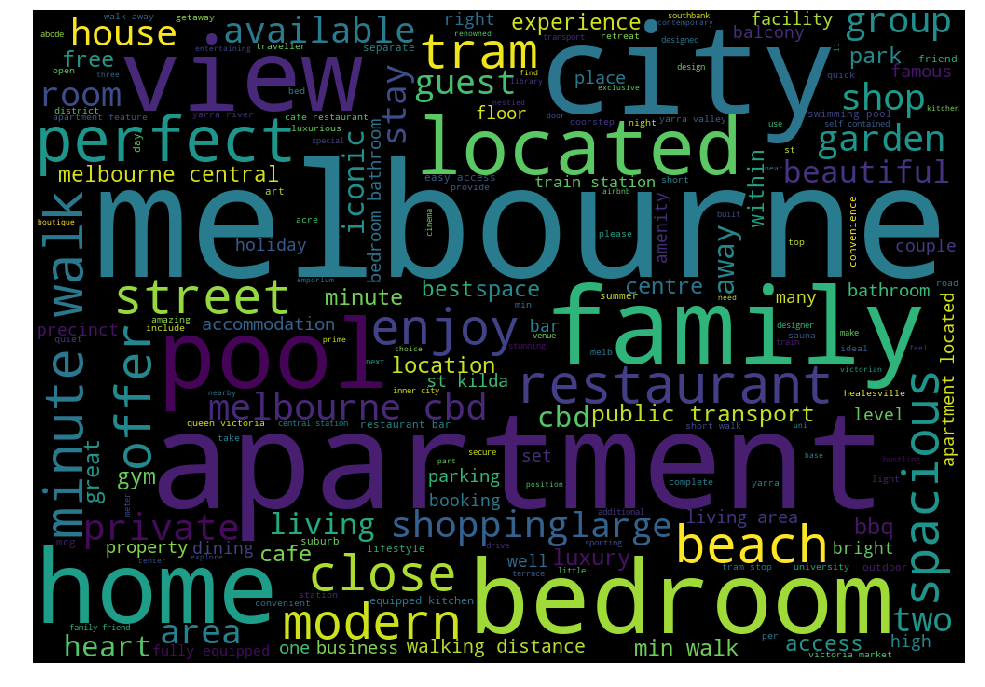

In [11]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(final_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be seen that unique words like home, Melbourne, bedroom, modern, pool, restaurant, view, minute walk, offer are very commonly words used when hosts are describing their homes.
This is making sense because the primary purpose of airbnb is not to provide luxury hotel suites but just a convinient place to stay.Naturally hosts understand these purposes and create their summaries based on location and requirements in order to attract as many travellers as they can.
So if hosts are not able to attract too many travellers then they can add these keywords to their summaries in order to attract travellers to choose their listings.

#### Analyzing how amenities affect the cost of the listings


In [12]:
import re

amenitiesDF = inputDF[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

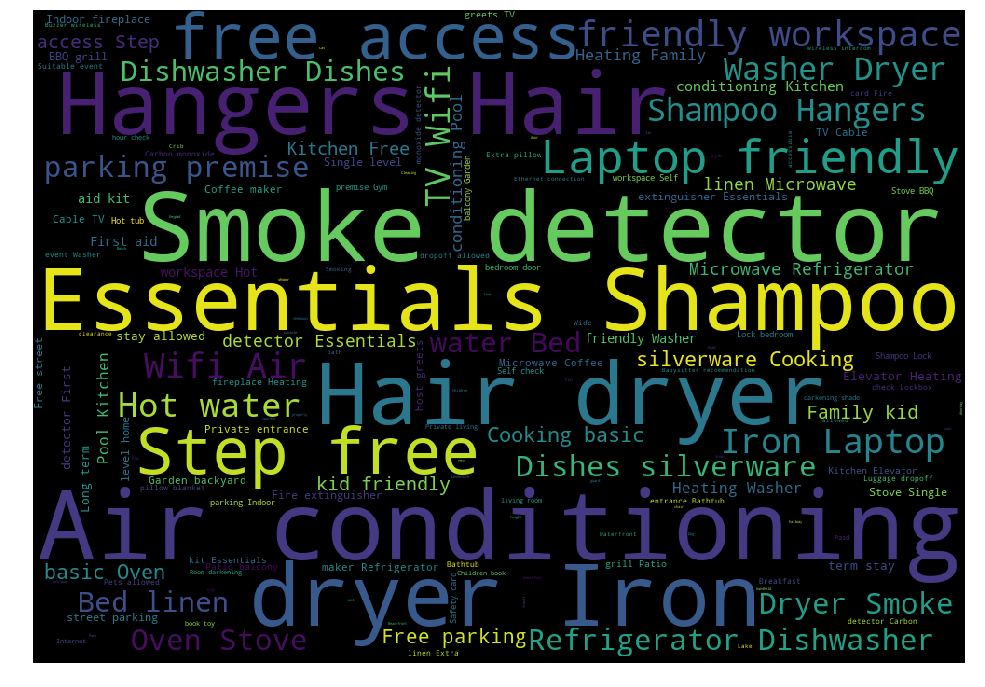

In [13]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_words)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

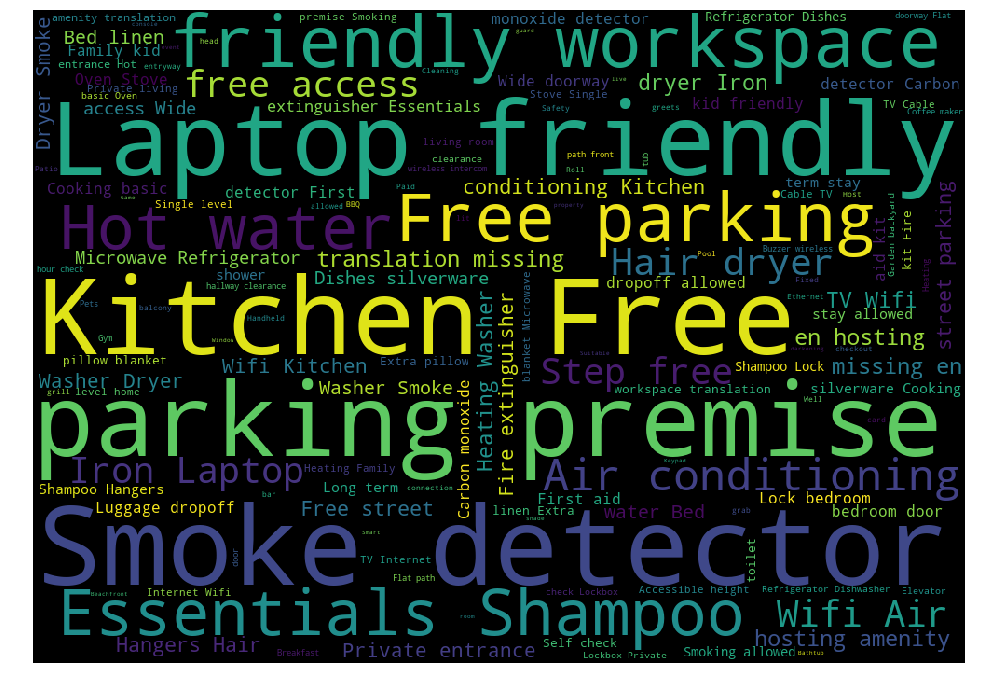

In [14]:
amenitiesDFbott =amenitiesDF.sort_values('price',ascending=[1])
amenitiesDFbottom=amenitiesDFbott.head(30)

allemenitiesb = ''
for index,row in amenitiesDFbottom.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenitiesb+=p

allemenities_datab=nltk.word_tokenize(allemenitiesb)
filtered_datab=[word for word in allemenities_datab if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_datab=[wnl.lemmatize(data) for data in filtered_datab]
allemenities_wordsb=' '.join(allemenities_datab)
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(width = 1000, height = 700).generate(allemenities_wordsb)
plt.figure(figsize=(18,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

It can be clearly seen that  listings with higher prices have extra eminities such as Wifi, washer/dryer, parking, microwave, hair dryer, smoke detector. Extra emenities comes with extra prices

## Summary of the analysis

It can be concluded that prices of listings depends upon following factors:

1) The type of room chosen by the traveller and mostly booking an Entire property costs maximum followed by private room and shared apartment.

2) The type of property chosen by the traveller
 - It can be analyzed that Campsite and Castles are the properties with maximum prices 
 - Apartments and houses take up an overwhelming majority of all listings.

3) Price of a listing also depends upon the number of bedrooms the property have and the same also depends upon the neighborhood of the property

4) The summary section is the one which helps to attract travellers and analyzed that presence of unique words like home, Melbourne, bedroom, modern, pool, restaurant, view, minute walk, offer words tends to attract more travellers

5) With the increase in prices the amenities provided by host also increases.